In [1]:
from textblob import TextBlob
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions
import re
from unicodedata import normalize
import string
import pandas as pd

In [2]:
def textblow_score(frase):
    polarity = TextBlob(frase).sentiment.polarity
    return polarity

# Lectura de datos

In [3]:
path_train="../../jigsaw-unintended-bias-in-toxicity-classification/train_split01.csv"
df_train = pd.read_csv(path_train)

In [4]:
# Selección de las columnas de interes
df_train_samp=df_train[['target', 'comment_text']]
#Para poder realizar un análsis equivalente al del Español, tomamos 600 comentarios
df_train_samp=df_train_samp.iloc[1:600, :]

In [5]:
df_train_samp['res_TextBlow']=df_train_samp.loc[:,'comment_text'].map(lambda txt: str(textblow_score(txt) ))

In [6]:
df_train_samp.target=[1 if elem > 0.6 else 0 for elem in df_train_samp.target ]
#df_train_samp.res_TextBlow = [1 if elem >= 0 else 0 for elem in df_train_samp.res_TextBlow ]

In [7]:
df_train_samp.res_TextBlow = [float(x) for x in df_train_samp.res_TextBlow]
df_train_samp.res_TextBlow = [1 if elem >= 0 else 0 for elem in df_train_samp.res_TextBlow ]

In [8]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


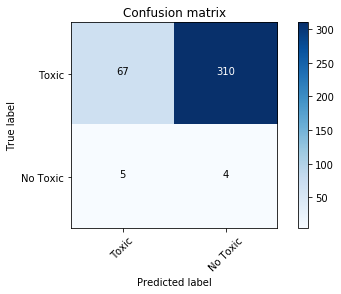

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools  

cm=confusion_matrix(df_train_samp.target, df_train_samp.res_TextBlow)
plot_confusion_matrix(cm, classes=['Toxic', 'No Toxic'])

In [10]:
df=df_train_samp
df[df['target']==1]

,target,comment_text,res_TextBlow
4,1,haha you guys are a bunch of losers.,1
5,1,ur a sh*tty comment.,1
31,1,Yet call out all Muslims for the acts of a few...,0
34,1,This bitch is nuts. Who would read a book by a...,1
123,1,Took this as an opportunity to check back in o...,0
289,1,You're an idiot.,0
306,1,Who cares!? Stark trek and Star Wars fans are ...,0
348,1,"Nincompoop, that's a nice one! I'm partial to ...",1
369,1,"Sorry to have to do this, but just to see if p...",0
